<a href="https://colab.research.google.com/github/anshuraj460016/AI-Lab/blob/main/Assignment%20-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path found (Manhattan): [(7, 0), (6, 0), (5, 1), (4, 2), (5, 3), (4, 4), (5, 5), (4, 6), (4, 7), (3, 8), (2, 9), (1, 9), (0, 9)]


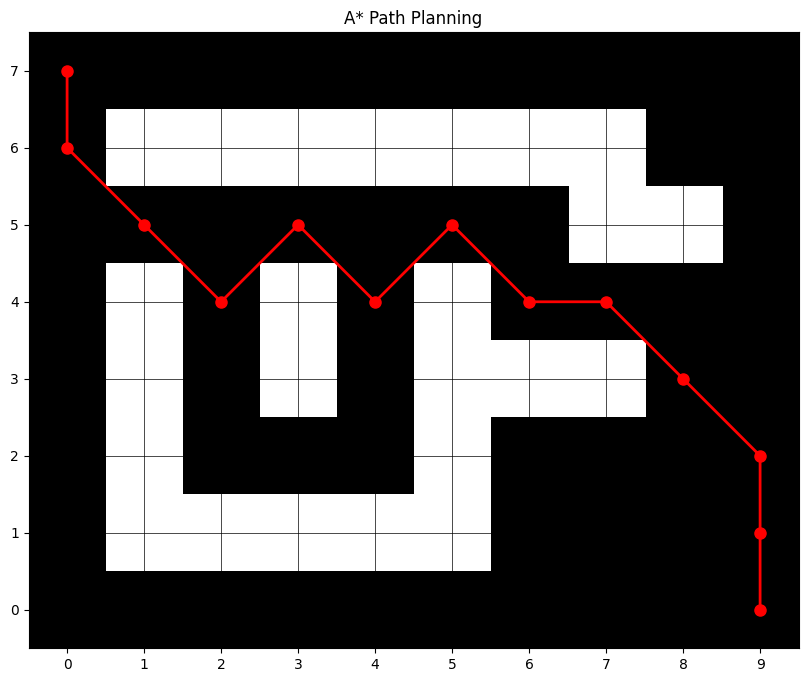

Path found (Euclidean): [(7, 0), (6, 0), (5, 1), (4, 2), (5, 3), (5, 4), (5, 5), (4, 6), (4, 7), (3, 8), (2, 9), (1, 9), (0, 9)]


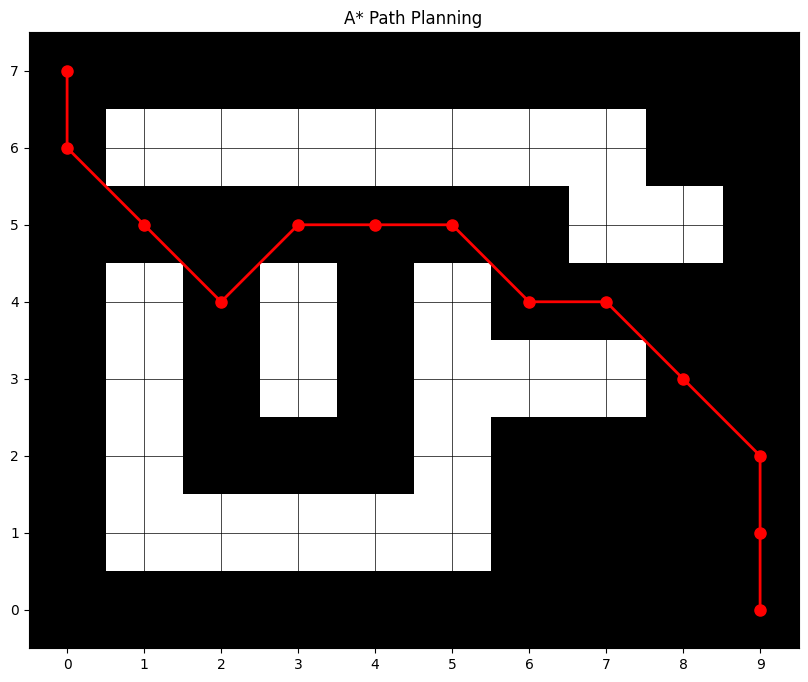

In [1]:
import heapq
import matplotlib.pyplot as plt
import math

class Node:
    def __init__(self, x, y, parent=None, cost=0, heuristic=0):
        self.x = x
        self.y = y
        self.parent = parent
        self.cost = cost
        self.heuristic = heuristic
        self.f_score = cost + heuristic

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __hash__(self):
        return hash((self.x, self.y))

    def __lt__(self, other):
        return self.f_score < other.f_score


def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)


def astar(grid, start, goal, heuristic_func):
    rows = len(grid)
    cols = len(grid[0])

    start_node = Node(start[0], start[1], heuristic=heuristic_func(start[0], start[1], goal[0], goal[1]))
    open_set = [start_node]
    heapq.heapify(open_set)
    closed_set = set()

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.x == goal[0] and current_node.y == goal[1]:
            path = []
            while current_node:
                path.append((current_node.x, current_node.y))
                current_node = current_node.parent
            return path[::-1]  # Return reversed path

        closed_set.add((current_node.x, current_node.y))

        neighbors = []
        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1,1), (1, -1), (-1, 1), (-1, -1)]: # Include diagonals
            nx, ny = current_node.x + dx, current_node.y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == 0:  # Check bounds and obstacles
                neighbors.append(Node(nx, ny, current_node))

        for neighbor in neighbors:
            if (neighbor.x, neighbor.y) in closed_set:
                continue

            neighbor.cost = current_node.cost + 1
            neighbor.heuristic = heuristic_func(neighbor.x, neighbor.y, goal[0], goal[1])
            neighbor.f_score = neighbor.cost + neighbor.heuristic

            existing_neighbor = None
            for node in open_set:
                if node == neighbor and node.f_score < neighbor.f_score:
                    existing_neighbor = node
                    break
            if existing_neighbor:
                continue
            heapq.heappush(open_set, neighbor)

    return None


def plot_path(grid, path):
    rows = len(grid)
    cols = len(grid[0])

    plt.figure(figsize=(cols, rows)) # Adjust figure size for proper grid display
    plt.imshow(grid, cmap='gray', origin='upper')  # Use gray colormap for grid

    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker='o', color='red', linewidth=2, markersize=8)  # Plot path

    plt.xticks(range(cols))  # Set x-axis ticks
    plt.yticks(range(rows))  # Set y-axis ticks
    plt.grid(which='both', linestyle='-', color='black', linewidth=0.5) # Add grid lines
    plt.gca().invert_yaxis() # Invert y-axis to match grid coordinates
    plt.title("A* Path Planning")
    plt.show()


# Example grid (0: free, 1: obstacle)
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

start = (7, 0) # y, x
goal = (0, 9)

# Using Manhattan distance (no diagonal moves):
path = astar(grid, start, goal, manhattan_distance)
if path:
    print("Path found (Manhattan):", path)
    plot_path(grid, path)
else:
    print("No path found (Manhattan).")

# Using Euclidean distance (diagonal moves allowed):
path = astar(grid, start, goal, euclidean_distance)
if path:
    print("Path found (Euclidean):", path)
    plot_path(grid, path)
else:
    print("No path found (Euclidean).")